# Students Performance in Exams

👉 This study will examine the dataset named as **"Students Performance in Exams"** at Kaggle website [external link text](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams).

This data set consists of the marks secured by the students in various subjects.
Context of this dataset is about to understand the influence of the parents background, test preparation etc on students performance.

There are 8 feature and clearly stated.
Features; 
gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [203]:
df=pd.read_csv('StudentsPerformance.csv')

In [204]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [205]:
df.shape

(1000, 8)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [207]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [208]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [209]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [210]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

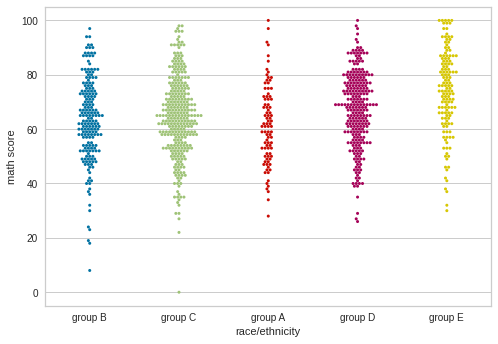

In [211]:
sns.swarmplot(y="math score", x="race/ethnicity", data=df, size=3);

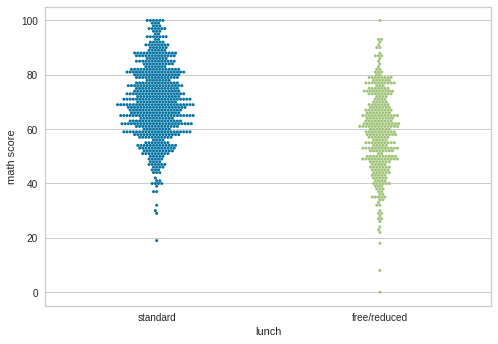

In [212]:
#plt.figure(figsize=(14, 5))
sns.swarmplot(y="math score", x="lunch", data=df, size=3);

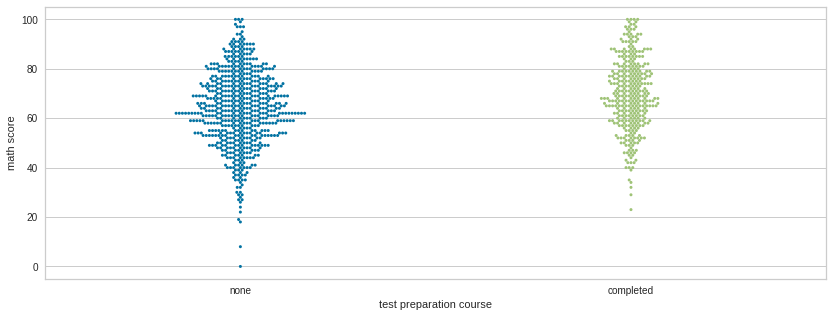

In [213]:
plt.figure(figsize=(14, 5))
sns.swarmplot(y="math score", x="test preparation course", data=df, size=3);

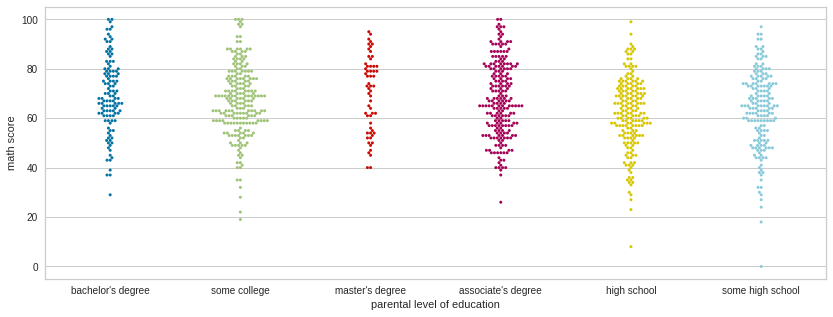

In [214]:
plt.figure(figsize=(14, 5))
sns.swarmplot(y="math score", x="parental level of education", data=df, size=3);

In [215]:
for row in df.iterrows():   # For each student means of scores.
  df["scores_mean"]=(df["math score"]+df["reading score"]+df["writing score"]) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,scores_mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [216]:
df.iloc[:,:5].columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [217]:
labelencoder = LabelEncoder()   # Clear numeric labels coded for the categoric features.
for i in list(df.iloc[:,:5].columns):
  if i == 'parental level of education':
    pass
  else:
   df[i] = labelencoder.fit_transform(df[i])

In [218]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,scores_mean
284,0,1,some high school,1,1,37,46,46,43.0


In [219]:
df['parental level of education'] = df['parental level of education'].replace(['high school', 'some high school',"some college"], 0)
df['parental level of education'] = df['parental level of education'].replace(["associate's degree"], 1)
df['parental level of education'] = df['parental level of education'].replace(["bachelor's degree"],2)
df['parental level of education'] = df['parental level of education'].replace(["master's degree"],3)


In [220]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,scores_mean
226,0,2,0,1,1,72,72,71,71.666667


In [221]:
x=df.iloc[:,2:]

In [222]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [223]:
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.4859226879922313
Number of cluster 3,silhouette0.4233311589267695
Number of cluster 4,silhouette0.3714718400155784
Number of cluster 5,silhouette0.35438555393312643
Number of cluster 6,silhouette0.32203772334639724
Number of cluster 7,silhouette0.29309270605811993
Number of cluster 8,silhouette0.3042105642953152
Number of cluster 9,silhouette0.3076123128918928


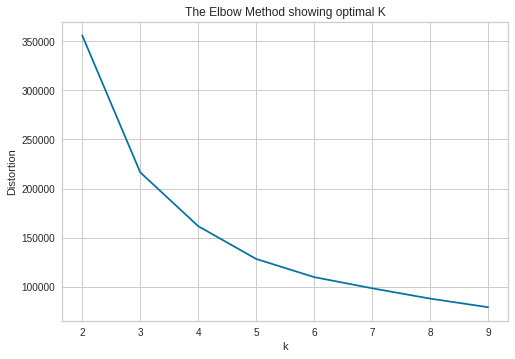

In [224]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 


In [225]:
from yellowbrick.cluster import KElbowVisualizer

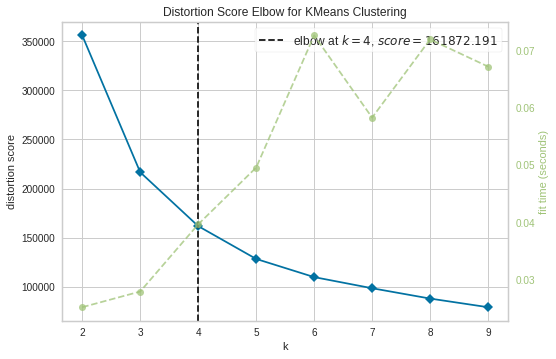

In [226]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.poof()

In [227]:
model=KMeans(n_clusters=3)
model=model.fit(x)
tahmin=model.predict(x)

In [228]:
tahmin

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

In [229]:
silhouette_score(x,tahmin)

0.4233311589267695

In [230]:
x['cluster']=tahmin

In [231]:
cluster_description = ({0 : 'Mid level Performance', 
                        1 : 'Low Level Performance',
                        2 : 'Good Performance'})

In [232]:
x['cluster description'] =x['cluster'].map(cluster_description)

In [233]:
x

,parental level of education,lunch,test preparation course,math score,reading score,writing score,scores_mean,cluster,cluster description
0,2,1,1,72,72,74,72.666667,0,Mid level Performance
1,0,1,0,69,90,88,82.333333,1,Low Level Performance
2,3,1,1,90,95,93,92.666667,1,Low Level Performance
3,1,0,1,47,57,44,49.333333,2,Good Performance
4,0,1,1,76,78,75,76.333333,1,Low Level Performance
...,...,...,...,...,...,...,...,...,...
995,3,1,0,88,99,95,94.000000,1,Low Level Performance
996,0,0,1,62,55,55,57.333333,2,Good Performance
997,0,0,0,59,71,65,65.000000,0,Mid level Performance
998,0,1,0,68,78,77,74.333333,0,Mid level Performance


In [234]:
# Parent's education level,lunch,course have an low effect on students' scores for this dataset.
# Race and etnicity is not important effect on these scores for this dataset also.

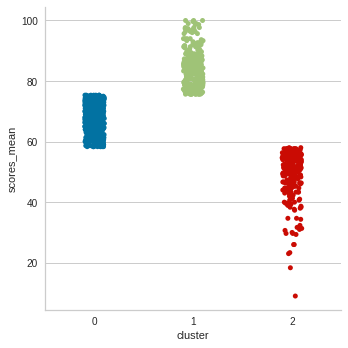

In [239]:
sns.catplot(x="cluster", y="scores_mean", data=x)